# <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Spaceship Titanic Survival Classification</p>

**<span style="color:teal;"> Spaceship Titanic Classification </span>** This notebook is part of the imaginary real valued accident of the spaceship titanic which as named is similar to the Titanic ship incident Competition. This notebook is created to analize the survivals reason of surviving as well as creating a Machine Learning Model to learn from the analysis and further forecast survivors

# <p style="background-color:teal;font-family:newtimeroman;color:white;text-align:center;font-size:120%;border-radius:20px 60px;">Table Of Contents</p>

* **Importing Library**
* **Loading data**
* **Data Preprocessing & Visualization**
* **Model Building**
  

# <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Importing Libraries</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import fbeta_score, make_scorer,confusion_matrix,accuracy_score
import time as time
from sklearn.svm import SVC

 # <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Loading Data</p>
  
  **About the data:**

train.csv file contains personal records for about two-thirds (~8700) of the passengers, to be used as training data with the following Columns:-

* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

Note: The above Description is from the Dataset Details Section found [here](https://www.kaggle.com/competitions/spaceship-titanic/data)

In [2]:
my_file = Path("train.csv")
if my_file.is_file()==False:
  !wget 'https://raw.githubusercontent.com/Bahaakhalled/Spaceship-Titanic/main/train.csv'
  !wget 'https://raw.githubusercontent.com/Bahaakhalled/Spaceship-Titanic/main/test.csv'

--2022-10-13 14:12:52--  https://raw.githubusercontent.com/Bahaakhalled/Spaceship-Titanic/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 805421 (787K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>] 786.54K  --.-KB/s    in 0.05s   

2022-10-13 14:12:53 (16.0 MB/s) - ‘train.csv’ saved [805421/805421]

--2022-10-13 14:12:54--  https://raw.githubusercontent.com/Bahaakhalled/Spaceship-Titanic/main/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 372487 (364K) [text/plain]
Sav

In [3]:
ship=pd.read_csv('train.csv')
test_ship=pd.read_csv('test.csv')
ship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
ship.shape

(8693, 14)

In [5]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


 # <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Data Preprocessing & Visualization</p>


<AxesSubplot:xlabel='Transported', ylabel='count'>

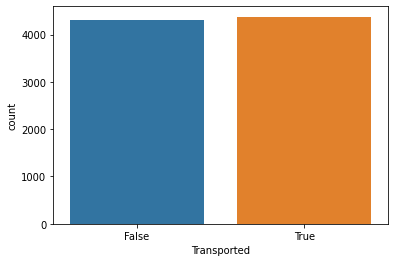

In [6]:
sns.countplot(x="Transported", data=ship)

* Countplot shows that the targeted Column is well balanced

In [7]:
ship['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [8]:
ship.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [9]:
missing=(ship.isnull().sum().sum()/np.product(ship.shape) ) * 100
print('Data Missing: ',missing,'%')

Data Missing:  1.9095824226389047 %


In [10]:
print(int(missing),' % of the cells are missing is low but that is',ship.shape[0] - ship.dropna().shape[0],'out of the',ship.shape[0],'rows given')

1  % of the cells are missing is low but that is 2087 out of the 8693 rows given


In [11]:
miss_cols=ship.columns[ship.isnull().sum()>0]
miss_cols=ship[miss_cols]
miss_cols={'Features': miss_cols.isnull().sum().index,'Missing%':miss_cols.isnull().sum()}
miss_cols=pd.DataFrame(data=miss_cols).reset_index().drop('index',axis=1)
miss_cols['Missing%']=miss_cols['Missing%'].apply(lambda m:(m/ship.shape[0])*100)
miss_cols=miss_cols.sort_values(by='Missing%',ascending=False)
miss_cols

,Features,Missing%
1,CryoSleep,2.496261
8,ShoppingMall,2.392730
5,VIP,2.335212
0,HomePlanet,2.312205
11,Name,2.300702
2,Cabin,2.289198
10,VRDeck,2.162660
7,FoodCourt,2.105142
9,Spa,2.105142
3,Destination,2.093639


In [12]:
c_ship=ship.copy()

In [13]:
twoval_cols=c_ship.loc[:, c_ship.nunique() ==2].columns
print('Columns with True/False Results: ',twoval_cols)
twoval_map = {True: 1, False: 0}
for i in twoval_cols:
  c_ship[i] = c_ship[i].map(twoval_map)

Columns with True/False Results:  Index(['CryoSleep', 'VIP', 'Transported'], dtype='object')


First Aprroach is removing the 2 percent missing Items however the two percents represent 2087 rows from the total of

In [14]:
c_ship[miss_cols.Features].describe()

,CryoSleep,ShoppingMall,VIP,VRDeck,FoodCourt,Spa,RoomService,Age
count,8476.000000,8485.000000,8490.000000,8505.000000,8510.000000,8510.000000,8512.000000,8514.000000
mean,0.358306,173.729169,0.023439,304.854791,458.077203,311.138778,224.687617,28.827930
std,0.479531,604.696458,0.151303,1145.717189,1611.489240,1136.705535,666.717663,14.489021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000
75%,1.000000,27.000000,0.000000,46.000000,76.000000,59.000000,47.000000,38.000000
max,1.000000,23492.000000,1.000000,24133.000000,29813.000000,22408.000000,14327.000000,79.000000


In [15]:
c_ship_miss = c_ship.dropna(axis=0)
c_ship_miss=c_ship_miss.reset_index().drop('index',axis=1)

array([[<AxesSubplot:title={'center':'CryoSleep'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'VIP'}>],
       [<AxesSubplot:title={'center':'RoomService'}>,
        <AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>,
        <AxesSubplot:title={'center':'Transported'}>]], dtype=object)

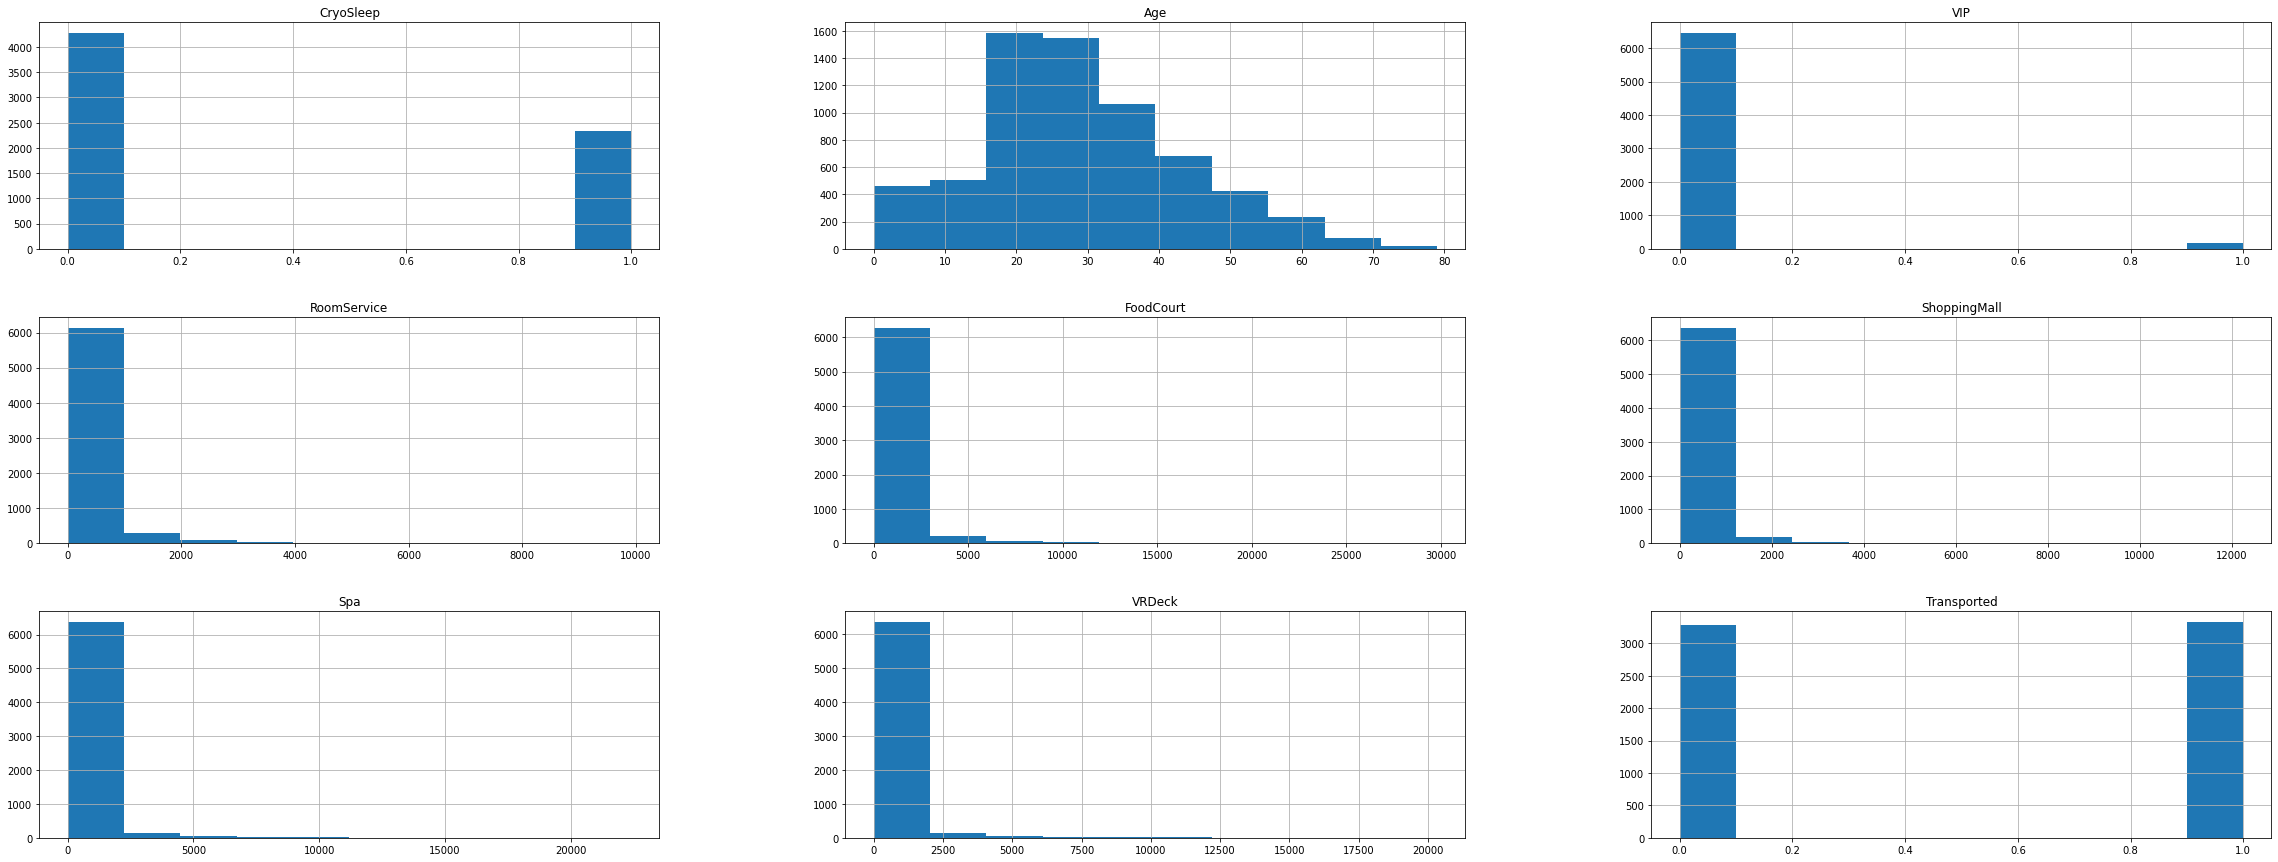

In [16]:
c_ship_miss.hist(figsize=(40, 15))

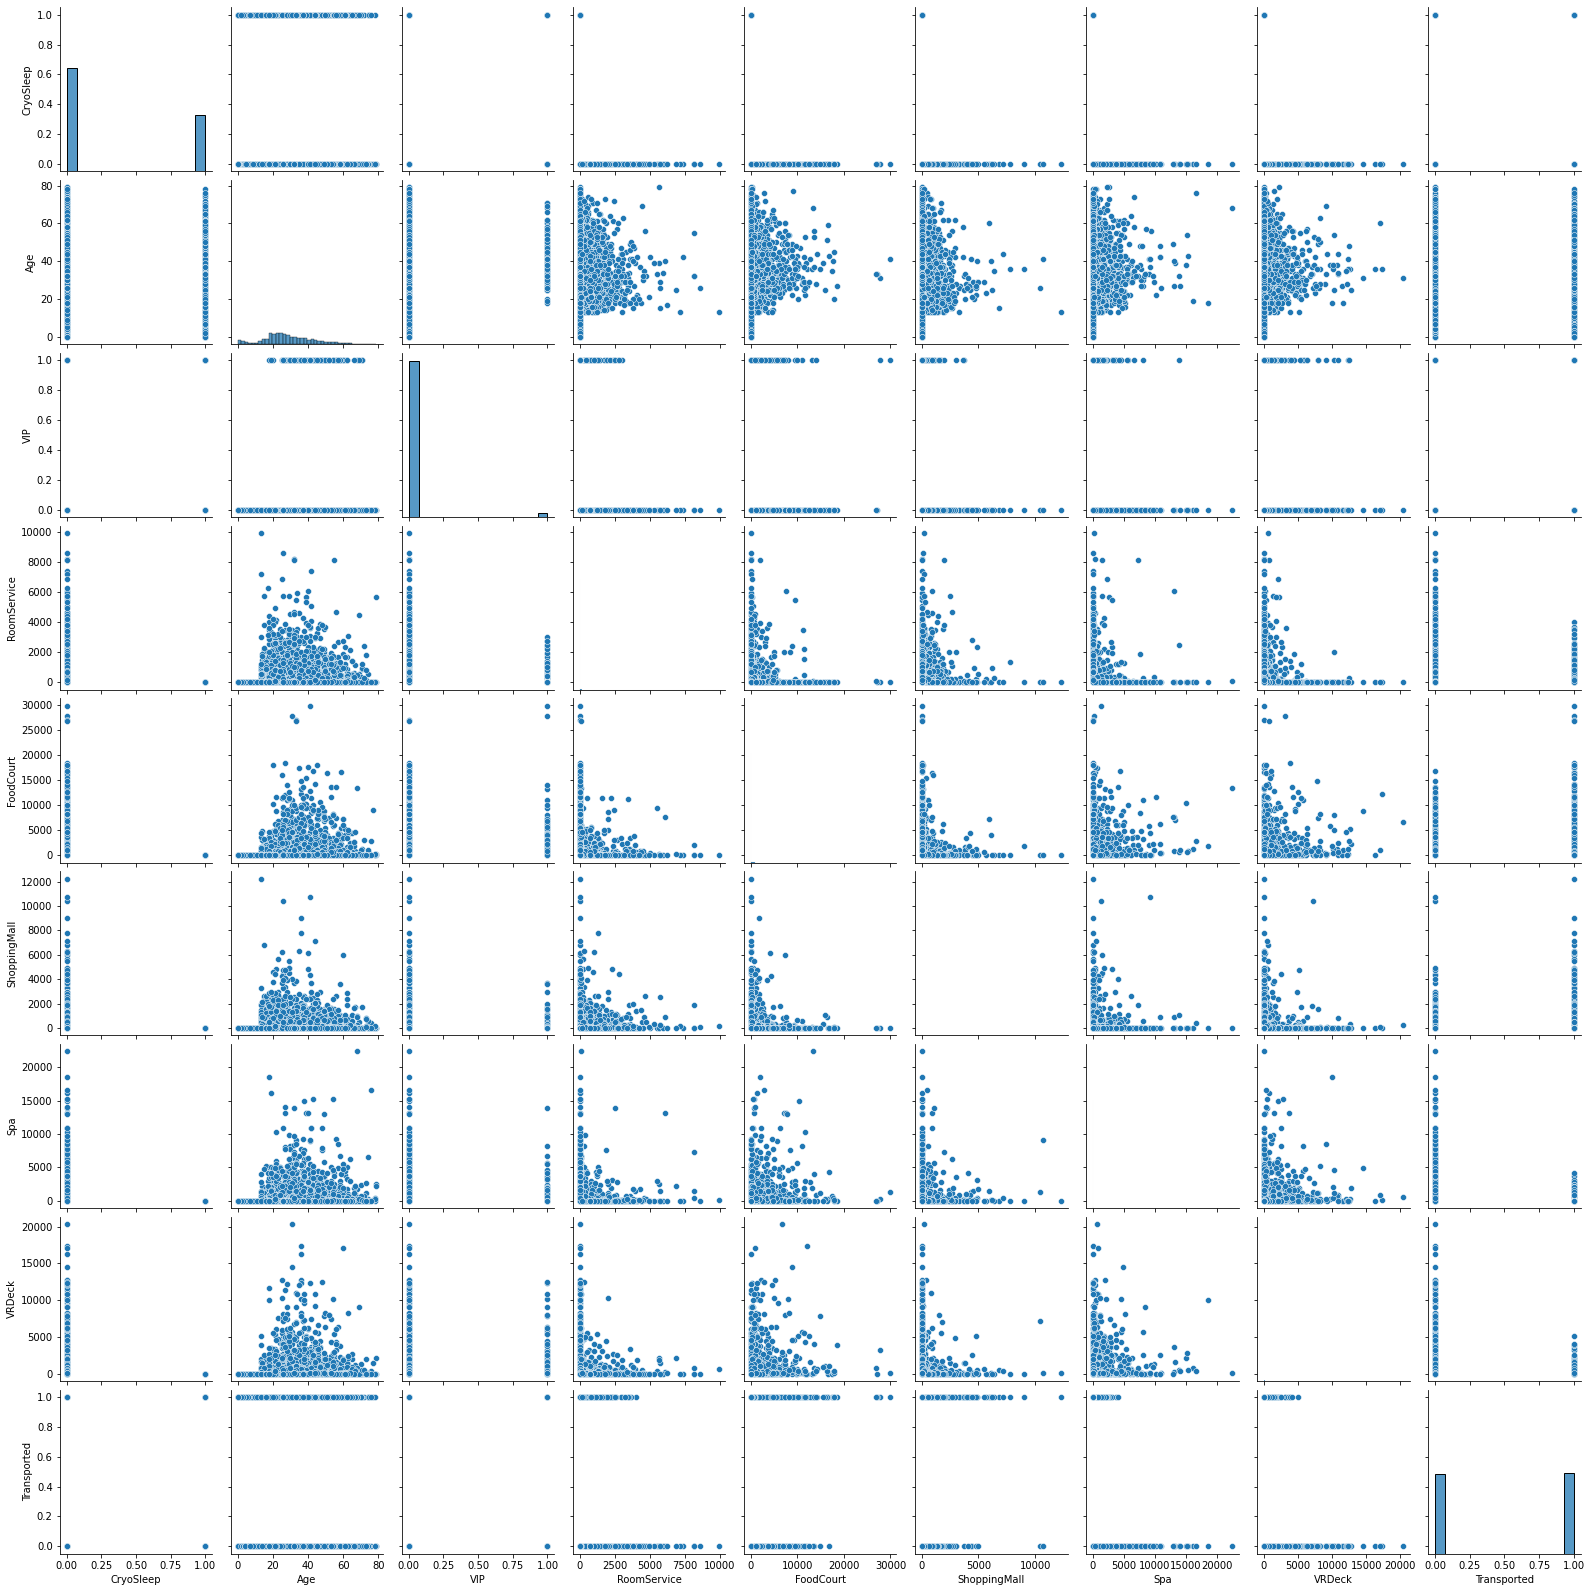

In [17]:
sns.pairplot(data=c_ship_miss)

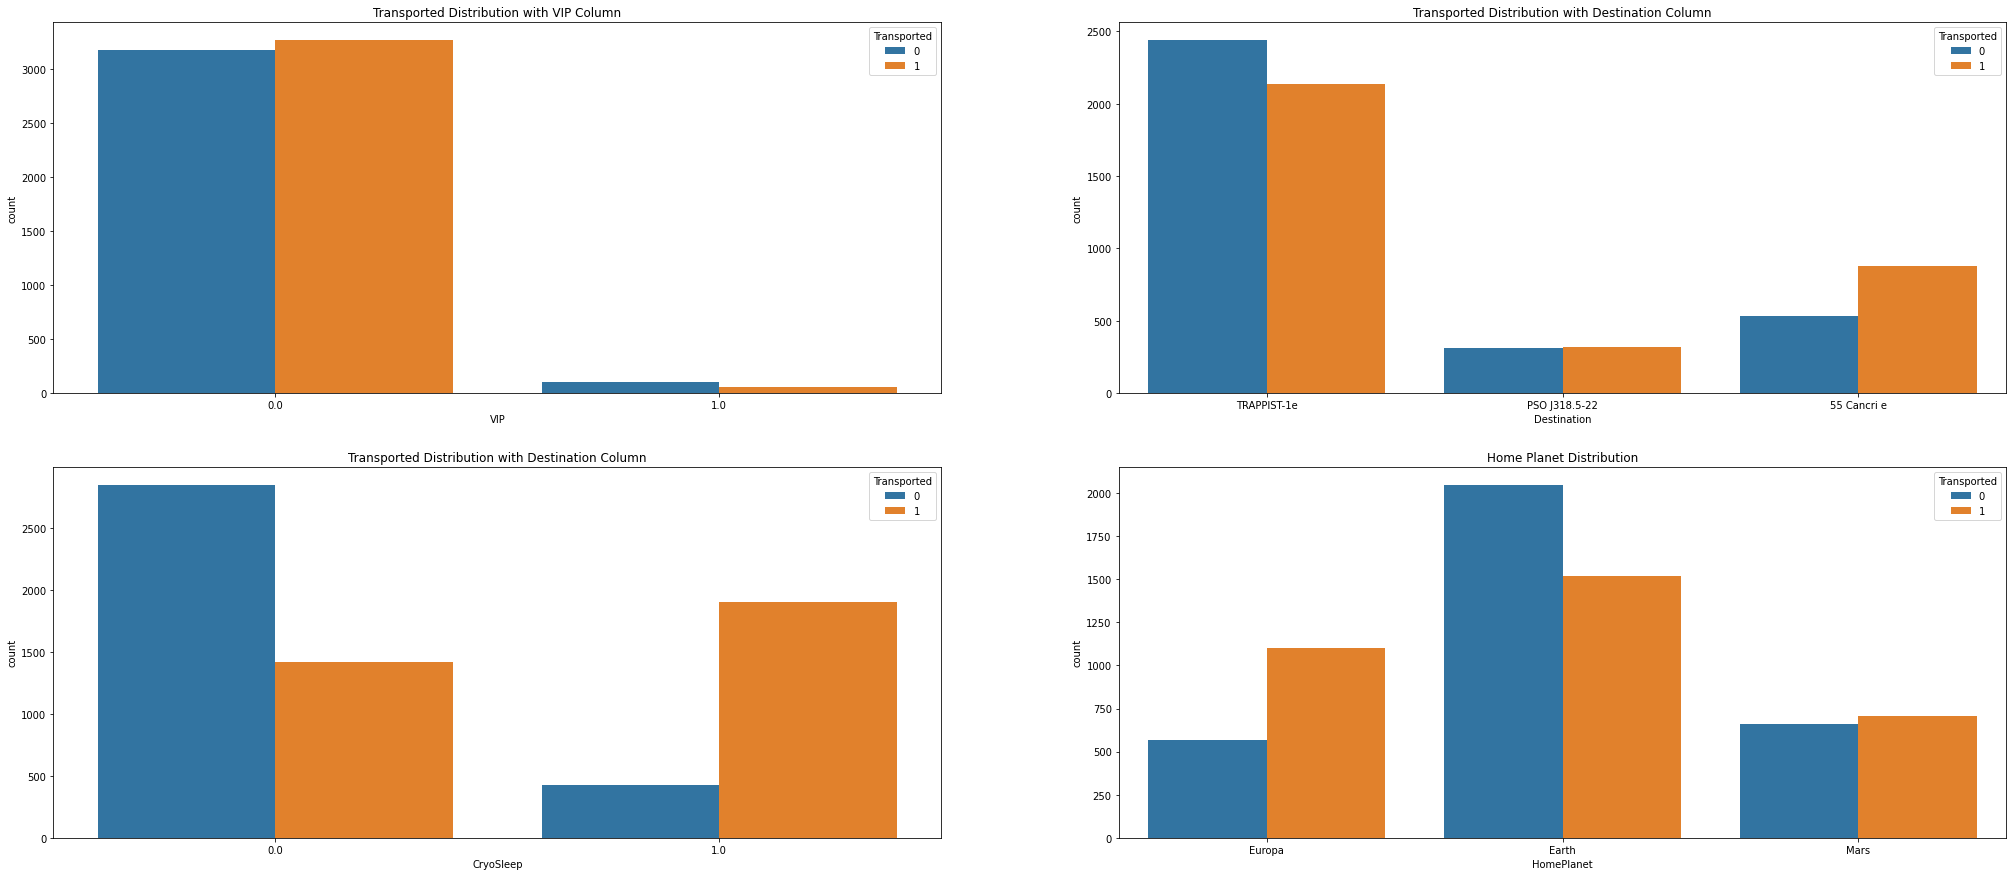

In [18]:
figure, axis = plt.subplots(2, 2,figsize=(35,15))

sns.countplot(ax=axis[0,0],data=c_ship_miss,x='VIP',hue='Transported')
axis[0, 0].set_title("Transported Distribution with VIP Column")
  
sns.countplot(ax=axis[0,1],data=c_ship_miss,x='Destination',hue='Transported')
axis[0, 1].set_title("Transported Distribution with Destination Column")
  

sns.countplot(ax=axis[1,0],x ='CryoSleep', data = c_ship_miss,hue='Transported')
axis[1, 0].set_title("Transported Distribution with Destination Column")

sns.countplot(ax=axis[1,1],x ='HomePlanet', data = c_ship_miss,hue='Transported')
axis[1, 1].set_title("Home Planet Distribution")
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

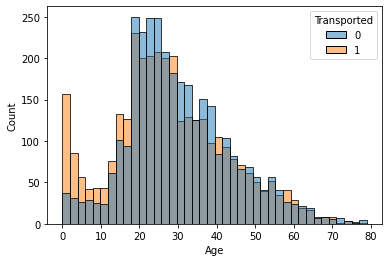

In [19]:
sns.histplot(data=c_ship_miss, x="Age",hue="Transported")

In [20]:
total_age=c_ship_miss.groupby('Age').PassengerId.count()
total_age=pd.DataFrame(total_age).reset_index()
total_age=total_age.rename(columns={'PassengerId':'Total_Age'})
agegroup=c_ship_miss.groupby(['Age','Transported']).PassengerId.count()
agegroup=pd.DataFrame(agegroup)
agegroup=agegroup.reset_index()

In [21]:
age_stats=pd.merge(agegroup,total_age, on='Age')
age_stats['Age Survival %']=(age_stats['PassengerId']/age_stats['Total_Age'])*100
survived=age_stats.loc[age_stats['Transported']==1].sort_values(by=['Age Survival %','PassengerId'],ascending=False)

In [22]:
bin1=survived.loc[survived.Age<20]
bin2=survived.loc[(survived.Age>20) & (survived.Age<40)]
bin3=survived.loc[(survived.Age>40) & (survived.Age<60)]
bin4=survived.loc[survived.Age>60]
bin1=bin1['Age Survival %'].sum()/bin1.shape[0]
bin2=bin2['Age Survival %'].sum()/bin2.shape[0]
bin3=bin3['Age Survival %'].sum()/bin3.shape[0]
bin4=bin4['Age Survival %'].sum()/bin4.shape[0]
Bins={'Age Group':['0-20','20-40','40-60','60-80'],'Survival Rate':[bin1,bin2,bin3,bin4]}
sur=pd.DataFrame(data=Bins)
sur

,Age Group,Survival Rate
0,0-20,62.861828
1,20-40,46.001919
2,40-60,49.794652
3,60-80,51.078146


<AxesSubplot:ylabel='Survival Rate'>

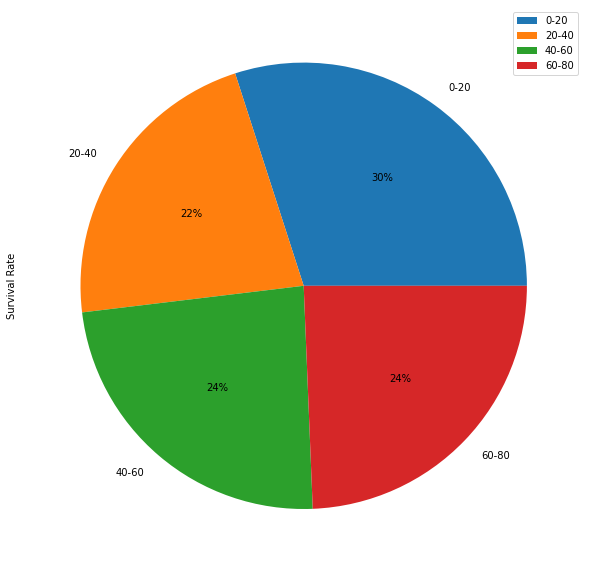

In [23]:
sur.plot(kind='pie',y='Survival Rate',labels=sur['Age Group'], autopct='%1.0f%%',figsize=(10, 15))

In [24]:
Luxurycols=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Transported']

In [25]:
c_ship_miss[Luxurycols].corr()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
RoomService,1.000000,-0.013614,0.060478,0.012472,-0.026002,-0.247291
FoodCourt,-0.013614,1.000000,-0.012320,0.215995,0.216997,0.055025
ShoppingMall,0.060478,-0.012320,1.000000,0.022168,0.000383,0.011602
Spa,0.012472,0.215995,0.022168,1.000000,0.149447,-0.219854
VRDeck,-0.026002,0.216997,0.000383,0.149447,1.000000,-0.207950
Transported,-0.247291,0.055025,0.011602,-0.219854,-0.207950,1.000000


In [26]:
split=c_ship_miss['Cabin'].str.split('/')
deck=list()
num=list()
side=list()
for i in range(split.shape[0]):
  #print(i)
  deck.append(split[i][0])
  num.append(split[i][1])
  side.append(split[i][2])
c_ship_miss['Cabin_Deck']=deck
c_ship_miss['Cabin_Number']=num
c_ship_miss['Cabin_Side']=side
c_ship_miss.drop('Cabin',axis=1,inplace=True)

In [27]:
Cabin_details=['Cabin_Deck','Cabin_Number','Cabin_Side']
c_ship_miss[Cabin_details].nunique()

Cabin_Deck         8
Cabin_Number    1734
Cabin_Side         2
dtype: int64

<AxesSubplot:xlabel='Cabin_Side', ylabel='count'>

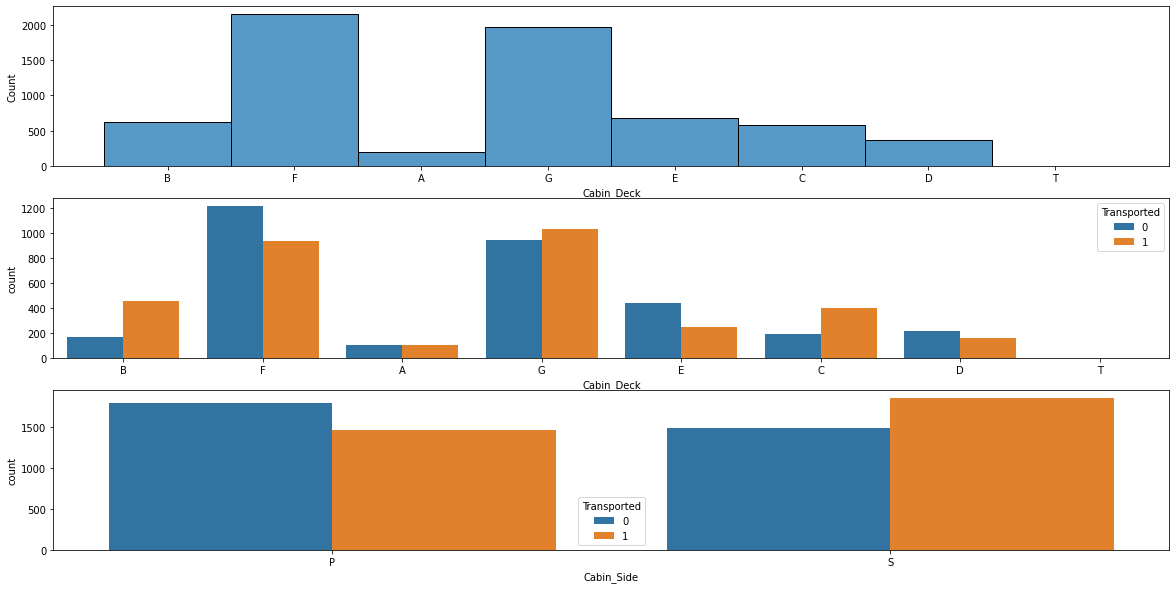

In [28]:
figure, axis = plt.subplots(3, 1,figsize=(20,10))
sns.histplot(ax=axis[0],data=c_ship_miss, x="Cabin_Deck")
sns.countplot(ax=axis[1],data=c_ship_miss,x='Cabin_Deck',hue='Transported')
sns.countplot(ax=axis[2],data=c_ship_miss,x='Cabin_Side',hue='Transported')

In [29]:
c_ship_miss.Cabin_Side.value_counts()

S    3345
P    3261
Name: Cabin_Side, dtype: int64

 # <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Model Building</p>
 
 **Steps involved in Model Building:**

* Assigning values to features as X and target as y
* Split test and training sets
* Fitting 6 different models(3 linear and 3 ensemble models) in search for the model with the best accuracy and fbeta score
* Hyperparameter tuning using GridSearch CV
* Fitting the final model 
* Evaluating the confusion matrix

In [30]:
Features=['HomePlanet', 'CryoSleep','Destination', 'Age','VIP','Cabin_Side','Cabin_Deck']
X=c_ship_miss[Features]
y=c_ship_miss['Transported']

In [31]:
def predictbasicmodels(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  print("X set has {} samples.".format(X.shape))
  print("Training set has {} samples.".format(X_train.shape[0]))
  print("Testing set has {} samples.".format(X_test.shape[0]))
  print()
  clf_A = SVC(random_state=3)
  clf_B = LogisticRegression(random_state=3)
  clf_C = GaussianNB()

  results = {}
  for clf in [clf_A, clf_B, clf_C]:
      clf_name = clf.__class__.__name__
      results[clf_name] = {}
      results[clf_name] = \
      results = {}
      clf = clf.fit(X_train, y_train)
        
      predictions_test = clf.predict(X_test)
      print(clf)
      print('Accuracy Score: ' + str(accuracy_score(y_test,predictions_test)))
      print('fb Score: '+ str(fbeta_score(y_test,predictions_test,beta=0.5)))
      print()
  return X_train, X_test, y_train, y_test


def predictadvmodels(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  print("Training set has {} samples.".format(X_train.shape[0]))
  print("Testing set has {} samples.".format(X_test.shape[0]))
  print()
  clf_A = RandomForestClassifier(random_state=3)
  clf_B = DecisionTreeClassifier(random_state=3)
  clf_C = AdaBoostClassifier(random_state=3)

  results = {}
  for clf in [clf_A, clf_B, clf_C]:
      clf_name = clf.__class__.__name__
      results[clf_name] = {}
      results[clf_name] = \
      results = {}
      clf = clf.fit(X_train, y_train)
        
      predictions_test = clf.predict(X_test)
      print(clf)
      print('Accuracy Score: ' + str(accuracy_score(y_test,predictions_test)))
      print('fb Score: '+ str(fbeta_score(y_test,predictions_test,beta=0.5)))
      print()
  return X_train, X_test, y_train, y_test

In [32]:
X=pd.get_dummies(X,drop_first=True)
X_train, X_test, y_train, y_test=predictbasicmodels(X,y)

X set has (6606, 15) samples.
Training set has 5284 samples.
Testing set has 1322 samples.

SVC(random_state=3)
Accuracy Score: 0.7299546142208775
fb Score: 0.7541899441340782

LogisticRegression(random_state=3)
Accuracy Score: 0.7344931921331316
fb Score: 0.7493984187005843

GaussianNB()
Accuracy Score: 0.7155824508320726
fb Score: 0.7250250584697628



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [33]:
X_train, X_test, y_train, y_test=predictadvmodels(X,y)

Training set has 5284 samples.
Testing set has 1322 samples.

RandomForestClassifier(random_state=3)
Accuracy Score: 0.6913767019667171
fb Score: 0.6925207756232687

DecisionTreeClassifier(random_state=3)
Accuracy Score: 0.699697428139183
fb Score: 0.7071547420965059

AdaBoostClassifier(random_state=3)
Accuracy Score: 0.7329803328290468
fb Score: 0.7447165380744717



In [34]:
def Gridsrch(clf):

  parameters={'n_estimators':[30,50,60,80,90],'learning_rate':[0.01,0.001,0.2]}
  scorer=make_scorer(fbeta_score,beta=0.1)
  grid_layout=GridSearchCV(clf,parameters,scoring=scorer)

  grid_fit=grid_layout.fit(X_train,y_train)

  best_clf=grid_fit.best_estimator_

  #predict using plane and optimized model
  predictions=(clf.fit(X_train,y_train).predict(X_test))
  best_predictions=best_clf.predict(X_test)
  print(str(clf) +" before Optimization: " + str(fbeta_score(y_test,predictions,beta=0.5)))
  print(str(clf) +" after Optimization: " + str(fbeta_score(y_test,best_predictions,beta=0.5)))
  print(grid_fit.best_params_)
  return grid_fit

In [35]:
grid_fit=Gridsrch(AdaBoostClassifier(random_state=3))

AdaBoostClassifier(random_state=3) before Optimization: 0.7447165380744717
AdaBoostClassifier(random_state=3) after Optimization: 0.7611704230921312
{'learning_rate': 0.01, 'n_estimators': 30}


In [36]:
test_ship=pd.read_csv('test.csv')
test_ship.shape

(4277, 13)

In [37]:
test_ship.shape[0] - test_ship.dropna().shape[0]

996

In [38]:
test_ship.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [39]:
si=SimpleImputer(strategy='most_frequent')
train_miss=pd.DataFrame(si.fit_transform(test_ship))
train_miss.columns=test_ship.columns
train_miss.index=test_ship.index
#train_miss['Cabin'] = train_miss['Cabin'].replace('missing_value', '0/0/0')

In [40]:
split=train_miss['Cabin'].str.split('/')
deck=list()
num=list()
side=list()
for i in range(split.shape[0]):
  deck.append(split[i][0])
  num.append(split[i][1])
  side.append(split[i][2])
train_miss['Cabin_Deck']=deck
train_miss['Cabin_Number']=num
train_miss['Cabin_Side']=side
train_miss.drop('Cabin',axis=1,inplace=True)

In [41]:
train_miss['Age']=train_miss['Age'].astype(int)

In [42]:
train_miss['CryoSleep'] = train_miss['CryoSleep'].map(twoval_map)
train_miss['VIP'] = train_miss['VIP'].map(twoval_map)
X_test=train_miss[Features]
X_test=pd.get_dummies(X_test,drop_first=True)

In [43]:
preds=grid_fit.best_estimator_.fit(X,y).predict(X_test)

In [44]:
extra_results=pd.DataFrame(preds, columns = ['Transported'])
tf_map={0 : False,1 : True}
extra_results['Transported']=extra_results['Transported'].astype(object)
extra_results['Transported']=extra_results['Transported'].map(tf_map)

In [45]:
extra_results["PassengerId"] = train_miss['PassengerId']
extra_results = extra_results[['PassengerId','Transported']]
extra_results.to_csv("submission.csv", index=False)